In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Number of Trips By Month

In [3]:
%%bigquery df --project massive-hexagon-403018
SELECT data_file_month as month
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE trip_distance > 0

Query is running:   0%|          |

Downloading:   0%|          |

In [4]:
df['month'] = df['month'].astype('category')

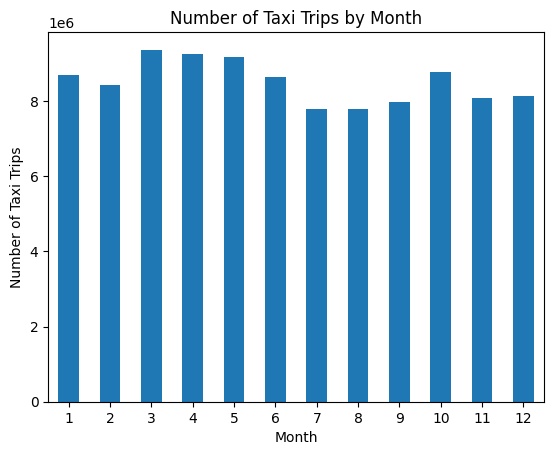

In [5]:
df['month'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel('Month')
plt.ylabel('Number of Taxi Trips')
plt.title('Number of Taxi Trips by Month')
plt.show()

The months with the most number of taxi trips are March, April, and May. The months with the least number of taxi trips are July, August, and September.

# Fare by Trip Duration

In [6]:
%%bigquery df --project massive-hexagon-403018
SELECT
  AVG(TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE)) AS avg_trip_duration,
  AVG(CAST(fare_amount AS FLOAT64)) AS avg_fare,
  pickup_location_id
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE trip_distance > 0
GROUP BY pickup_location_id

Query is running:   0%|          |

Downloading:   0%|          |

In [7]:
df = df[df['avg_trip_duration'] >= 0]

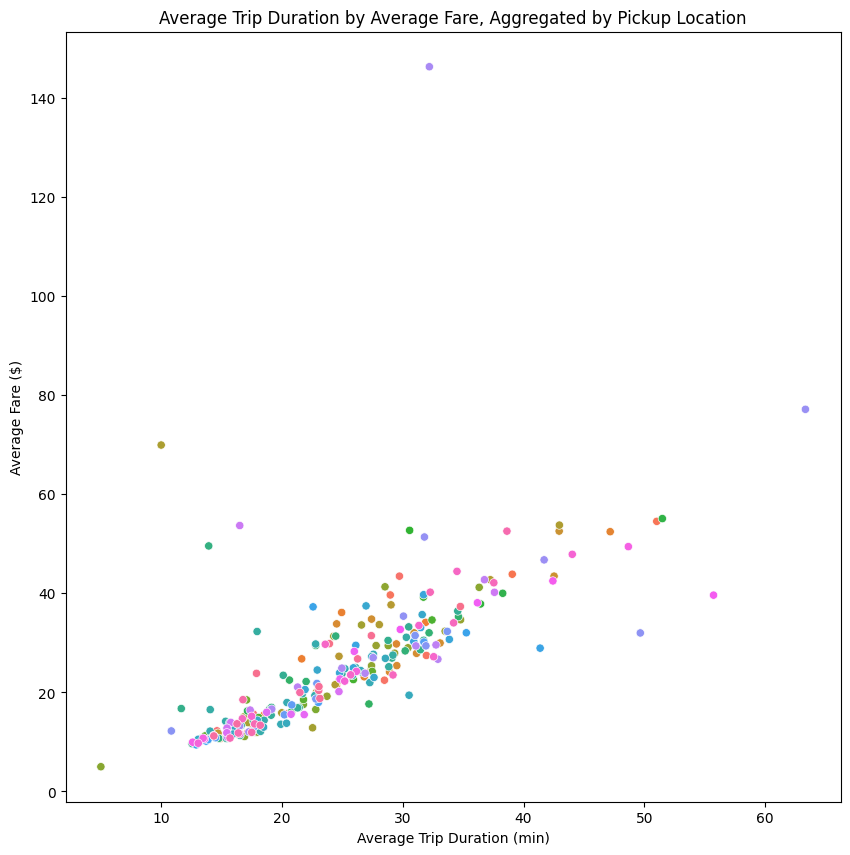

In [8]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='avg_trip_duration', y='avg_fare', hue='pickup_location_id', data=df, ax=ax, legend=False)
ax.set_xlabel('Average Trip Duration (min)')
ax.set_ylabel('Average Fare ($)')
ax.set_title('Average Trip Duration by Average Fare, Aggregated by Pickup Location')
fig.show()

One aspect that stands out is that there is one location with an average trip duration of a little over 30 minutes and really high average fare of a little over $140.

# Trip Duration by Day of Week and Hour

In [9]:
%%bigquery df --project massive-hexagon-403018
SELECT
  EXTRACT(DAYOFWEEK FROM pickup_datetime) AS day,
  EXTRACT(HOUR FROM pickup_datetime) AS hour,
  AVG(TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime, MINUTE)) AS avg_trip_duration,
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE trip_distance > 0
GROUP BY day, hour

Query is running:   0%|          |

Downloading:   0%|          |

In [10]:
df = df[df['avg_trip_duration'] >= 0]

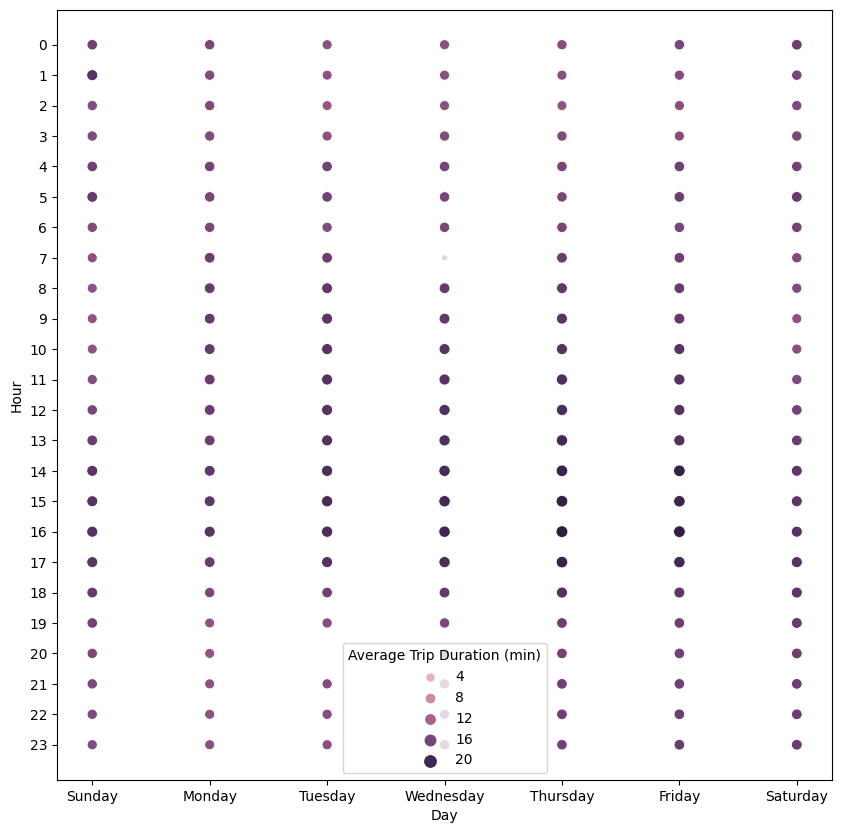

In [11]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='day', y='hour', size='avg_trip_duration', hue='avg_trip_duration', data=df)
ax.set_xlabel('Day')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.set_yticks(range(24))
ax.set_ylabel('Hour')
ax.get_legend().set_title('Average Trip Duration (min)')
ax.invert_yaxis()

There does not seem to be too much variation of average trip duration across the hours or days. The smallest average trip durations appear to be at 8 pm on Tuesdays and 7 am on Wednesdays.

# Toll Amount by Month

In [12]:
%%bigquery df --project massive-hexagon-403018
SELECT
  AVG(CAST(tolls_amount AS FLOAT64)) AS avg_toll,
  data_file_month as month
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE trip_distance > 0
GROUP BY month

Query is running:   0%|          |

Downloading:   0%|          |

In [13]:
df['month'] = df['month'].astype('category')

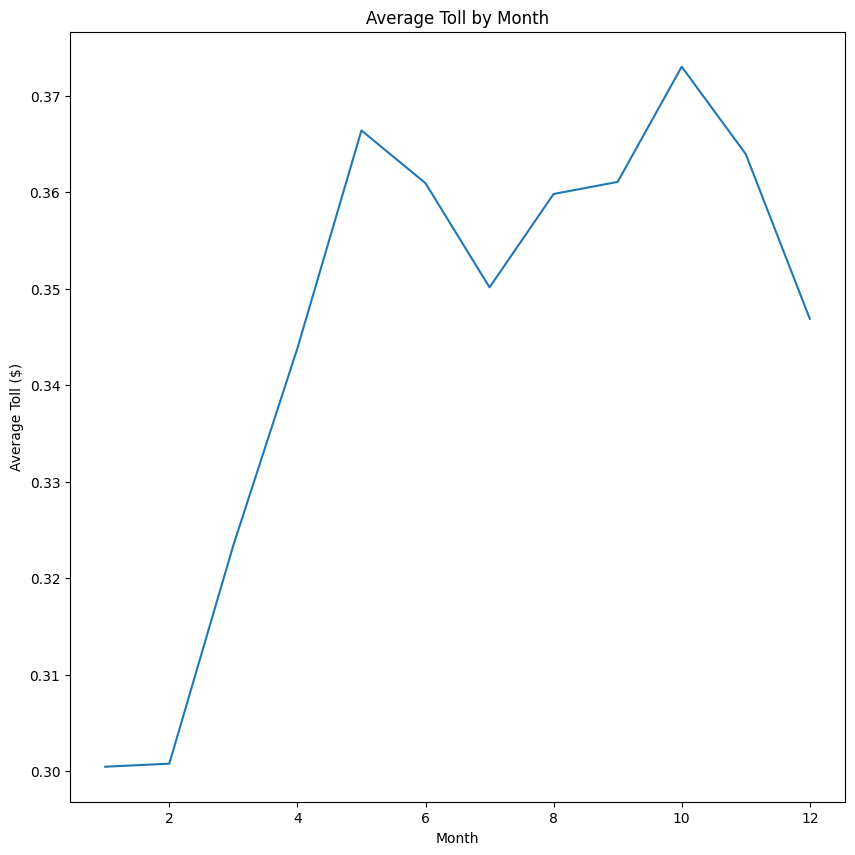

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x='month', y='avg_toll', data=df, ax=ax, legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Average Toll ($)')
ax.set_title('Average Toll by Month')
fig.show()

The average toll skyrockets by about 6 cents from February to May.